## <font style = "color:rgb(139,0,0)">APPLIED STATISTICS PROJECT</font>

### <font style = "color:rgb(139,0,0)">Data Description</font>

The data given here contains the medical costs of people characterized by certain attributes.

### <font style = "color:rgb(139,0,0)">Domain</font>

Healthcare

### <font style = "color:rgb(139,0,0)">Context</font>

Leveraging customer information is of paramount important for most businesses. In case of an insurance company, attributes of customers like the ones mentioned below can be crucial for making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have. 

### <font style = "color:rgb(139,0,0)">Attribute Information</font>

- **`age`** - age of primary beneficiary
- **`sex`** - insurance contractor gender, female, male
- **`bmi`** - Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 - 24.9
- **`children`** - Number of children covered by health insurance / number of dependents
- **`smoker`** - smoking
- **`region`** - the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- **`charges`** - Individual medical costs billed by health insurance

## <font style = "color:rgb(184,134,11)">Step A :- Importing the necessary libraries.</font>

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## <font style = "color:rgb(184,134,11)">Step B :- Reading the data as a data frame.</font>

In [84]:
insurance = pd.read_csv("insurance.csv")

In [85]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## <font style = "color:rgb(184,134,11)">Step C :- Performing basic EDA.</font>

### <font style = "color:rgb(184,134,11)">Step C-1 :- Shape of the data</font>

In [86]:
insurance.shape

(1338, 7)

This means that there are **7 features** and **1338 samples** in our dataset.

### <font style = "color:rgb(184,134,11)">Step C-2 :- Data type of each attribute.</font>

In [87]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

As expected, we can infer here that `age`, `bmi`, `children` and `charges` have the correct data type.

### <font style = "color:rgb(184,134,11)">Step C-3 :- Checking the presence of any missing values if any present.</font>

In [88]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [89]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [90]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We are seeing here that there are no missing values in any of the above columns.

### <font style = "color:rgb(184,134,11)">Step C-4 :- 5 Point summary of numerical attributes.</font>

In [91]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


For the 5 point summary, we will only need here - `min`, `25%`, `50%`, `75%` and `max`.

In [92]:
insurance.describe().iloc[3:,:]

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


we can see a sudden jump in `charges` column as we are moving from `50%` to `75%` and then to `max` row.<br> `bmi` also has a higher `max` value but aslso it shows a smooth transition from `25%` to `75%`. 

#### <font style = "color:rgb(50,0,0)">One thing should be checked here that we can also treat `children` as a categorical variable but since it has a numerical value in the dataset, I have shown the 5 point summary for it as well.</font>

### <font style = "color:rgb(184,134,11)">Step C-5 :- Distribution of `bmi`, `age`, `charges` columns.</font>

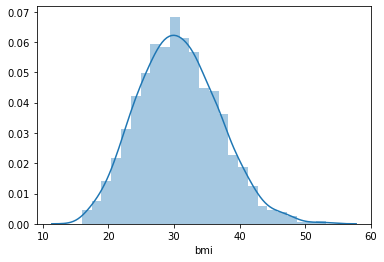

In [93]:
# Distribution plot of `bmi`.
sns.distplot(insurance.bmi)
plt.show()

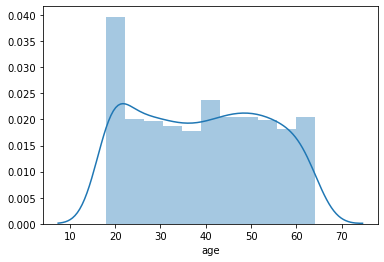

In [94]:
# Distribution plot of `age`.
sns.distplot(insurance.age)
plt.show()

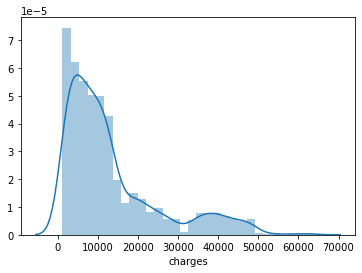

In [95]:
# Distribution plot of `charges`.
sns.distplot(insurance.charges)
plt.show()

As we can infer from the distribution plots that `charges` is **right skewed**, whereas `age` has a little closer **uniform distribution**.<br> `bmi` on the other hand has no significant skewness.

### <font style = "color:rgb(184,134,11)">Step C-6 :- Measurement of skewness of `bmi`, `age` and `charges` columns.</font>

In [96]:
#Here we will use pandas' skew() function for skewness measure.
insurance[['age','bmi','charges']].skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

As we see here that `bmi` is very slightly right skewed and therfore has a very low value.<br> `age` on the other hand has a distribution which is very close to a uniform distribution and therfore has a value very close to 0.<br> `charges` on the other hand is highly skewed and thus has a high value.

### <font style = "color:rgb(184,134,11)">Step C.7 :- Checking the presence of outliers in `bmi`, `age` and `charges` columns.</font>

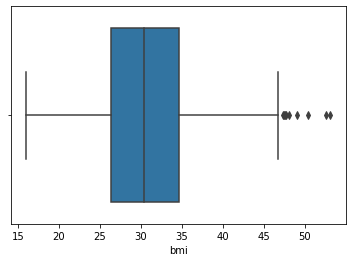

In [97]:
# Plotting box-plot for checking outliers
sns.boxplot(insurance.bmi)
plt.show()

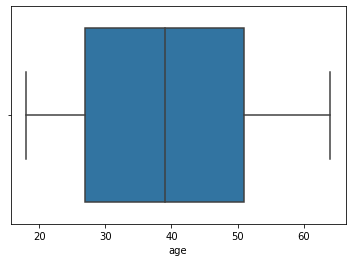

In [98]:
sns.boxplot(insurance.age)
plt.show()

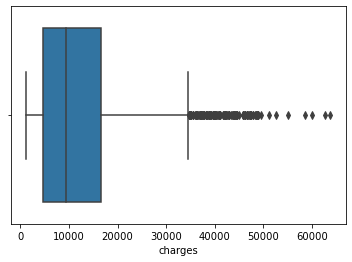

In [99]:
sns.boxplot(insurance.charges)
plt.show()

The results that we have obtained here match our initially done analysis :-<br> `charges` column has a lot of outliers.<br> `bmi` column also has a few number of outliers.<br> `age` column does not have any outliers.

### <font style = "color:rgb(184,134,11)">Step C-8 :- Distribution of categorical columns.(including children here)</font>

The categorical columns are:

1. `smoker`
2. `region`
3. `children`

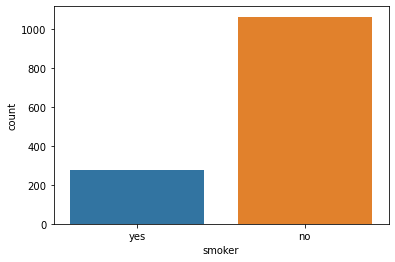

In [100]:
# We will be using here countplot for categorical columns.
sns.countplot(insurance.smoker)
plt.show()

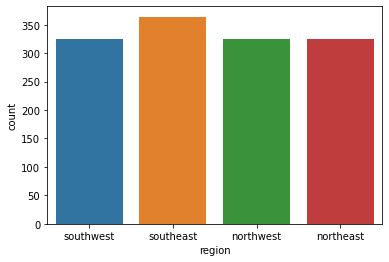

In [101]:
sns.countplot(insurance.region)
plt.show()

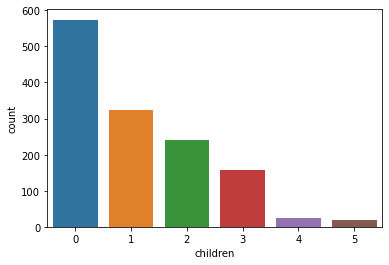

In [102]:
sns.countplot(insurance.children)
plt.show()

Things to be noted about the data here are as follows:

1. There seems to be an inbalance for `smoker` attribute. The number of people who do not smoke is far more than the number of people who smoke.
2. There is a similar inbalance in data for `children` attribute. People with no children or dependents is way high.

### <font style = "color:rgb(184,134,11)">Step C-9 :- Pair plot that includes all the columns of the data frame.</font>

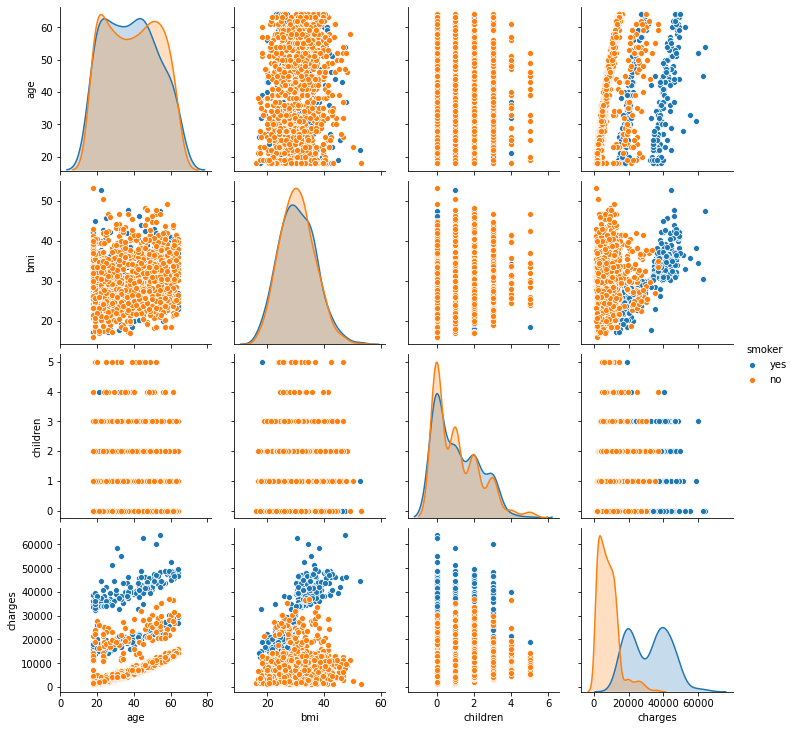

In [103]:
# We will use here seaborn's pairplot for analysis.
sns.pairplot(insurance,hue='smoker')
plt.show()

### Things to infer from here are as follows :-
    ** A clear trend can be seen between `age` and `charges` - as the age increases, the charges also increase. 
    For smokers, the charges are much higher.

    ** A similar but not very clear trend can be noticed between `bmi` and `charges` - as the bmi increases, the charges 
    also tend to increase, for smokers. 

    ** Both these trends make practical sense as well. People with larger age tend to fall ill much easily and that's why 
    the charges are higher. On the other hand, high bmi means the person is unhealthy and that's why the charges are higher. 
    As expected, the trend is more clear as the bmi becomes more than 30 considering that the ideal range ends at 24.9.

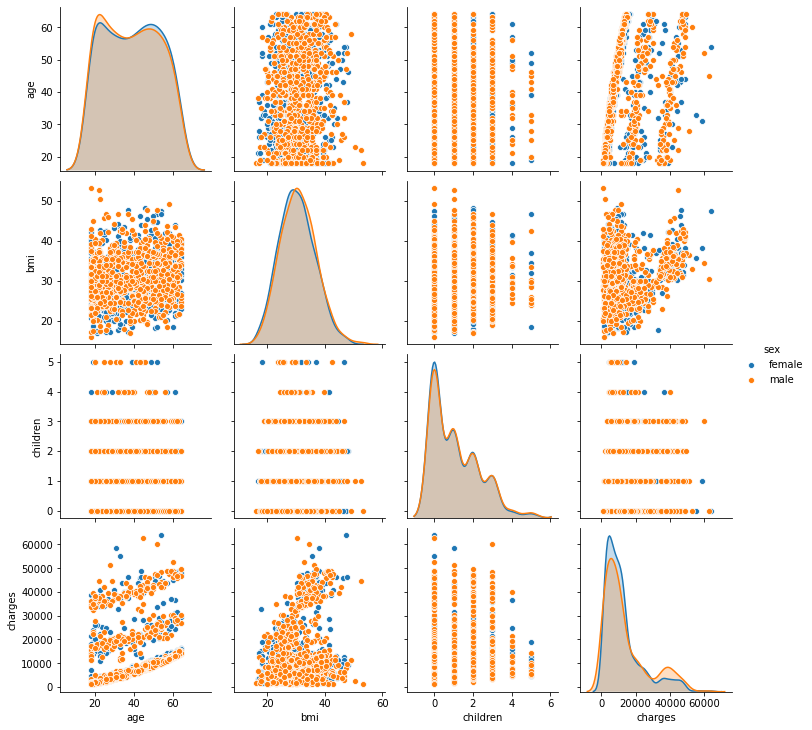

In [104]:
# We will use here seaborn's pairplot.
sns.pairplot(insurance,hue='sex')
plt.show()

There is not much variation in results for females and males.

## <font style = "color:rgb(184,134,11)">Step D :-</font>

### <font style = "color:rgb(184,134,11)">QUESTION :- Do charges of people who smoke differ significantly from the people who don't?</font>

In [105]:
# Let's start by making two groups of people.
# First, those who smoke and second, those who don't.
insurance.groupby("smoker").mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


As we can see from the above table output, on average; the people who smoke have much higher charges than those who don't.

Let us now verify the same using t-test. In all cases we will use significance level 0.05.

H1 : People who smoke and those who don't have the same mean charges.

H2 : People who smoke and those who don't have different mean charges.

We will assume that both groups have the same variance.

In [106]:
from scipy.stats import ttest_ind

In [107]:
group1 = insurance[insurance["smoker"]=="yes"].charges
group2 = insurance[insurance["smoker"]=="no"].charges

In [108]:
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


As the p-value < 0.05, thus we can reject the null hypothesis.

Therfore, charges of people who smoke versus those who don't differ significantly.

### <font style = "color:rgb(184,134,11)">QUESTION :- Does bmi of males differ significantly from that of females?</font>

In [109]:
#  Here again, we will group the data based on sex.
insurance.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


There is no significant difference in the bmi of males and females.

We will again use t-test in this case. The null and alternate hypotheses are as follows:

H1 : Mean bmi of males is the same as the mean bmi of females

H2 : Mean bmi of males is not the same as the mean bmi of females

In [110]:
group1 = insurance[insurance["sex"]=="female"].bmi
group2 = insurance[insurance["sex"]=="male"].bmi

In [111]:
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

-1.696752635752224 0.08997637178984932


Here the p-value is more than 0.05 so we cannot reject the null hypothesis.<br> Thus, we can't say that there is a significant difference in the mean bmi of males and females.

### <font style = "color:rgb(184,134,11)">QUESTION :- Is the proportion of smokers significantly different in different genders?</font>

In [112]:
# We select here only the smokers.
smokers = insurance[insurance["smoker"]=="yes"]

In [113]:
# Let's now see the gender distribution in smokers.
smokers.sex.value_counts()

male      159
female    115
Name: sex, dtype: int64

In [114]:
# Proportion of males that smoke :-
males_smoker = smokers.sex.value_counts()["male"] * 100 / insurance.sex.value_counts()["male"]
# Proportion of females that smoke :-
females_smoker = smokers.sex.value_counts()["female"] * 100 / insurance.sex.value_counts()["female"]

In [115]:
males_smoker,females_smoker

(23.5207100591716, 17.371601208459214)

As we see here that 23.5% males are smokers in the dataset whereas only 17.37% females are smokers.<br> Therefore there is a significant difference in the proportion.

Now let's do the statistical analysis for this problem.

We will use proportions test for this:-

H1 : Proportions of smokers are same in both genders.

H2 : Proportions of smokers are different in both genders.

In [116]:
from statsmodels.stats.proportion import proportions_ztest

In [117]:
female_smokers = insurance[insurance["sex"]=="female"].smoker.value_counts()[1]
male_smokers = insurance[insurance["sex"]=="male"].smoker.value_counts()[1]

In [118]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [119]:
n_females = insurance.sex.value_counts()[1]
n_males = insurance.sex.value_counts()[0]

In [120]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant so We reject the null.')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant so We fail to reject the null.')

With a p-value of 0.0053 the difference is significant so We reject the null.


Therfore, we see that there is a significant difference in both proportions.

### <font style = "color:rgb(184,134,11)">QUESTION :- Is the distribution of bmi across women with no children, one children and two children the same?</font>

In [121]:
# Let's select all women.
women = insurance[insurance["sex"]=="female"]

In [122]:
# Next, let's select women with no children.
women_0 = women[women["children"]==0]
# Women with 1 children.
women_1 = women[women["children"]==1]
# Women with 2 children.
women_2 = women[women["children"]==2]

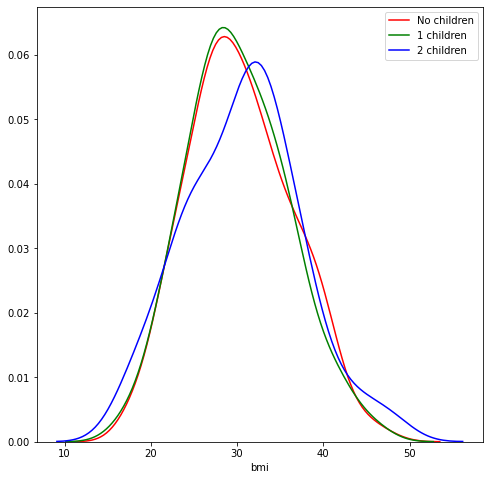

In [123]:
# Let's now plot the bmi distribution.
plt.figure(figsize=(8,8))
sns.distplot(women_0.bmi,hist=False,color="red",label="No children")
sns.distplot(women_1.bmi,hist=False,color="green",label="1 children")
sns.distplot(women_2.bmi,hist=False,color="blue",label="2 children")
plt.show()

We can see here that there is not much difference in bmi distribution for women with No children and women with 1 children.<br> For women with 2 children, there is a slight difference in distribution but nothing that can be considered significant.

In [124]:
# Now let's also check on the basis of 5 point summary for bmi for the 3 dataframes.
women_0.bmi.describe()

count    289.000000
mean      30.361522
std        5.966934
min       17.290000
25%       26.200000
50%       29.925000
75%       34.600000
max       47.410000
Name: bmi, dtype: float64

In [125]:
women_1.bmi.describe()

count    158.000000
mean      30.052658
std        5.786831
min       16.815000
25%       25.982500
50%       29.567500
75%       33.942500
max       46.090000
Name: bmi, dtype: float64

In [126]:
women_2.bmi.describe()

count    119.00000
mean      30.64979
std        6.62820
min       17.19500
25%       25.77000
50%       31.30000
75%       34.75000
max       48.07000
Name: bmi, dtype: float64

In [127]:
# Let's create a new dataframe here.
df1 = pd.DataFrame({'Num_Children':0,'bmi':women_0.bmi.values})

In [128]:
df2 = pd.DataFrame({'Num_Children':1,'bmi':women_1.bmi.values})
df3 = pd.DataFrame({'Num_Children':2,'bmi':women_2.bmi.values})

In [129]:
bmi_df = pd.DataFrame()
bmi_df = bmi_df.append(df1)
bmi_df = bmi_df.append(df2)
bmi_df = bmi_df.append(df3)

In [130]:
bmi_df.head()

,Num_Children,bmi
0,0,27.90
1,0,25.74
2,0,25.84
3,0,26.29
4,0,39.82


In [131]:
bmi_df.tail()

,Num_Children,bmi
114,2,34.700
115,2,26.315
116,2,40.370
117,2,24.225
118,2,25.740


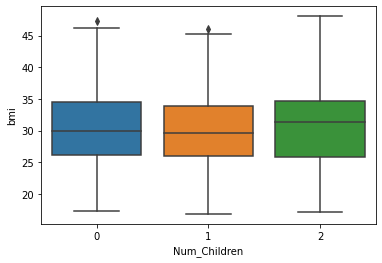

In [132]:
sns.boxplot(x = "Num_Children", y = "bmi", data = bmi_df)
plt.show()

#### A few things to infer from above are as follows :-

 ** There are much more women with No children as compared to women with 1 or 2 children.<br> This matches our initial analysis.
<br><br> ** Mean, minimum and maximum bmi for all the 3 dataframes is very close.<br> Similarly for other quartiles also.

#### So, we can conclude that there is no significant difference in bmi distribution across women with no children, women with 1 children and the women with two children.

Now for statistical analysis, we will use ANOVA. 

H1 : Mean bmi for no children, 1 children and 2 children is same.

H2 : At least one of the 3 means is different.

In [133]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

In [134]:
mod = ols('bmi ~ Num_Children', data = bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq     df         F   PR(>F)
Num_Children      2.512982    1.0  0.068411  0.79376
Residual      20717.738725  564.0       NaN      NaN


As the p-value is 0.79376 which is more than 0.05 therfore we can not reject the null hypothesis.<br> So, we can say that the 3 mean bmi (0 children, 1 children and 2 children) are all same.